# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems.

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps?
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [1]:
# Recommended versions
# numpy 	1.26.4
# pandas	2.2.2
# matplotlib	3.7.1
# seaborn	0.10.0
# plotly	5.24.1

In [2]:
#import the libraries
import pandas as pd, numpy as np

In [3]:
#read the dataset and check the first five rows
imp0 =pd.read_csv("googleplaystore_v2.csv")
imp0.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
#Check the shape of the dataframe
imp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis

    
 - Incorrect Data Types:
    - Clean certain values
    - Clean and convert an entire column


In [5]:
#Check the datatypes of all the columns of the dataframe
imp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [6]:
#Check the number of null values in the columns
imp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [7]:
#Drop the rows having null values in the Rating field
    # It is Target variable so will be not good to guess, so drop those null records
imp1=imp0[ ~imp0.Rating.isnull() ] # Take the complement(~) of rating null records 

#Check the shape of the dataframe
imp1.shape

(9367, 13)

In [8]:
# Check the number of nulls in the Rating field again to cross-verify
imp1.Rating.isnull().sum()

0

In [9]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
imp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [10]:
#Inspect the nulls in the Android Version column
imp1[ imp1['Android Ver'].isnull() ]

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

In [11]:
#Drop the row having shifted values (3rd row , index=10472)
#imp1.loc[10472,:] # row, column : as it is hard coding we will use below method 
imp1[ ( imp1['Android Ver'].isnull() )   &   ( imp1['Category'] == "1.9" )  ] # 3rd row  condition

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

               Size Installs Type     Price Content Rating             Genres  \
10472  21516.529524     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [12]:
#Drop the row having shifted values (3rd row , index=10472)
#imp1.loc[10472,:] # row, column : as it is hard coding we will use below method 
imp1[ ( imp1['Android Ver'].isnull() )   &   ( imp1['Category'] == "1.9" )  ] # 3rd row  condition
imp1 = imp1[ ~(   (imp1['Android Ver'].isnull())   &    (imp1['Category'] == "1.9" )  )  ] # We need all receord except 3rd row , used complement(~)
#Check the nulls againin Android version column to cross-verify
imp1[ imp1['Android Ver'].isnull() ]

App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5     189   2100.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization   July 20, 2018   
4490  10,000+  Free      0       Everyone  Personalization  March 27, 2018   

     Current Ver Android Ver  
4453         4.4         NaN  
4490         1.1         NaN

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [13]:
#Check the most common value in the Android version column
imp1['Android Ver'].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [14]:
imp1['Android Ver'].mode()

0    4.1 and up
Name: Android Ver, dtype: object

In [15]:
imp1['Android Ver'].mode()[0]

'4.1 and up'

In [16]:
#Fill up the nulls in the Android Version column with the above value
imp1['Android Ver'] =  imp1['Android Ver'].fillna(imp1['Android Ver'].mode()[0])

In [17]:
#Check the nulls in the Android version column again to cross-verify
imp1['Android Ver'].isnull().sum() 

0

In [18]:
#Check the nulls in the entire dataframe again
imp1.isnull().sum() 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [19]:
imp1[ imp1['Current Ver'].isnull() ]

App            Category  Rating Reviews  \
15    Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2      55   
1553             Market Update Helper  LIBRARIES_AND_DEMO     4.1   20145   
6322           Virtual DJ Sound Mixer               TOOLS     4.2    4010   
7333                      Dots puzzle              FAMILY     4.0     179   

         Size    Installs  Type  Price Content Rating            Genres  \
15     2700.0      5,000+  Free      0       Everyone      Art & Design   
1553     11.0  1,000,000+  Free      0       Everyone  Libraries & Demo   
6322   8700.0    500,000+  Free      0       Everyone             Tools   
7333  14000.0     50,000+  Paid  $0.99       Everyone            Puzzle   

           Last Updated Current Ver Android Ver  
15         June 6, 2018         NaN  4.2 and up  
1553  February 12, 2013         NaN  1.5 and up  
6322       May 10, 2017         NaN  4.0 and up  
7333     April 18, 2018         NaN  4.0 and up

In [20]:
#Check the most common value in the Current version column
imp1['Current Ver'].value_counts()

Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [21]:
imp1['Current Ver'].mode()

0    Varies with device
Name: Current Ver, dtype: object

In [22]:
imp1['Current Ver'].mode()[0]

'Varies with device'

In [23]:
imp1['Current Ver'].fillna(imp1['Current Ver'].mode()[0])

0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10834                 1.0.0
10836                  1.48
10837                   1.0
10839    Varies with device
10840    Varies with device
Name: Current Ver, Length: 9366, dtype: object

In [24]:
#Replace the nulls in the Current version column with the above value
imp1['Current Ver'] =  imp1['Current Ver'].fillna(imp1['Current Ver'].mode()[0])

In [25]:
imp1['Current Ver'].isnull().sum()

0

In [26]:
# Question : Check the most common value in the Current version column again
imp1['Current Ver'].mode()[0]

'Varies with device'

In [27]:
# Count again the 
imp1['Current Ver'].value_counts()

Current Ver
Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [28]:
# non zero values for the "4.1 and up"
imp1[ (imp1['Android Ver'] == "4.1 and up")  &  (imp1['Price'] != "0")  ]

App            Category  Rating  \
427                        Puffin Browser Pro       COMMUNICATION     4.0   
476                 Moco+ - Chat, Meet People              DATING     4.2   
571                 Moco+ - Chat, Meet People              DATING     4.2   
852    Fuzzy Numbers: Pre-K Number Foundation           EDUCATION     4.7   
1001                           Meme Generator       ENTERTAINMENT     4.6   
...                                       ...                 ...     ...   
9627            ai.type keyboard Plus + Emoji               TOOLS     4.5   
9647                               The EO Bar  HEALTH_AND_FITNESS     4.7   
9717               The Great Wobo Escape Ep.1              FAMILY     4.3   
9932                      Campervan.Guide Pro    TRAVEL_AND_LOCAL     4.2   
10645            Football Manager Mobile 2018              SPORTS     3.9   

      Reviews          Size  Installs  Type  Price Content Rating  \
427     18247  21516.529524  100,000+  Paid  $3.99       Everyone   
476      1545  21516.529524   10,000+  Paid  $3.99     Mature 17+   
571      1546  21516.529524   10,000+  Paid  $3.99     Mature 17+   
852        21  44000.000000    1,000+  Paid  $5.99       Everyone   
1001     3771  53000.000000  100,000+  Paid  $2.99     Mature 17+   
...       ...           ...       ...   ...    ...            ...   
9627    57076  35000.000000  100,000+  Paid  $4.49       Everyone   
9647      416  34000.000000   10,000+  Paid  $6.99       Everyone   
9717       11  20000.000000      500+  Paid  $1.99   Everyone 10+   
9932      238  67000.000000   10,000+  Paid  $5.99       Everyone   
10645   11460  21516.529524  100,000+  Paid  $8.99       Everyone   

                          Genres    Last Updated         Current Ver  \
427                Communication    July 5, 2018         7.5.3.20547   
476                       Dating   June 19, 2018             2.6.139   
571                       Dating   June 19, 2018             2.6.139   
852          Education;Education   July 21, 2017                 1.3   
1001               Entertainment  August 3, 2018               4.426   
...                          ...             ...                 ...   
9627                       Tools   July 24, 2018        Paid-9.4.1.3   
9647            Health & Fitness    July 2, 2018               1.3.7   
9717   Action;Action & Adventure     May 3, 2016            1.0.3289   
9932              Travel & Local   June 22, 2018               4.6.2   
10645                     Sports   June 27, 2018  Varies with device   

      Android Ver  
427    4.1 and up  
476    4.1 and up  
571    4.1 and up  
852    4.1 and up  
1001   4.1 and up  
...           ...  
9627   4.1 and up  
9647   4.1 and up  
9717   4.1 and up  
9932   4.1 and up  
10645  4.1 and up  

[107 rows x 13 columns]

In [29]:
print(imp1["Price"].unique())

['0' '$4.99' '$3.99' '$6.99' '$7.99' '$5.99' '$2.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99' '$29.99' '$12.99' '$2.49' '$10.99' '$1.50'
 '$19.99' '$15.99' '$33.99' '$39.99' '$3.95' '$4.49' '$1.70' '$8.99'
 '$1.49' '$3.88' '$399.99' '$17.99' '$400.00' '$3.02' '$1.76' '$4.84'
 '$4.77' '$1.61' '$2.50' '$1.59' '$6.49' '$1.29' '$299.99' '$379.99'
 '$37.99' '$18.99' '$389.99' '$8.49' '$1.75' '$14.00' '$2.00' '$3.08'
 '$2.59' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04' '$13.99' '$4.29'
 '$3.28' '$4.60' '$1.00' '$2.95' '$2.90' '$1.97' '$2.56' '$1.20']


In [30]:
# Convert to float, handling errors gracefully
#imp1["Price"] = pd.to_numeric(imp1["Price"], errors="coerce")

#### Handling Incorrect Data Types

In [31]:
#Check the datatypes of all the columns
imp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [32]:
imp1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [33]:
imp1["Price"].value_counts()

Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: count, Length: 73, dtype: int64

In [34]:
# taking each value of Price which is not 0 and taking from 2nd character onwards
imp1.Price =  imp1.Price.apply( lambda x : 0 if x=="0" else float(x[1:]) ) 

In [35]:
# check the Price data type now
imp1.Price.dtypes 

dtype('float64')

In [36]:
# check again the calue count for Price
imp1["Price"].value_counts()

Price
0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: count, Length: 73, dtype: int64

In [37]:
# check the calue count for Reviews
imp1["Reviews"].value_counts() 

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [38]:
# Change the type from Object to 
imp1.Reviews = imp1.Reviews.astype("int32")

In [39]:
# check once the converted data type
imp1.Reviews.dtype

dtype('int32')

In [40]:
imp1.Reviews.describe() # we can apply describe on numeric column 

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [41]:
# check once the data type for Installs
imp1.Installs.dtype

dtype('O')

In [42]:
# Check some values for Installs
imp1.Installs.head() #different format of number

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [43]:
# Convert comma and + sign 
# Remove commas and '+' sign, then convert to integer
imp1["Installs"] = imp1["Installs"].str.replace("[+,]", "", regex=True).astype(int)

In [44]:
# Check some values for Installs
imp1.Installs.head() #different format of number

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [45]:
# Now Change the type from Object to 
imp1.Installs = imp1.Installs.astype("int32")

In [46]:
imp1.Installs.describe() # we can apply describe on numeric column 

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [47]:
imp1["Price"].describe()

count    9366.000000
mean        0.960928
std        15.816585
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [48]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up"



In [49]:
#Analyse the Price column to check the issue



In [50]:
#Write the function to make the changes



In [51]:
#Verify the dtype of Price once again


In [52]:
#Analyse the Reviews column


In [53]:
#Change the dtype of this column


#Check the quantitative spread of this dataframe



In [54]:
#Analyse the Installs Column



In [55]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.


#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [56]:
#Perform the sanity checks on the Reviews column
imp1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [57]:
# Find record count where Reviews > Installs
imp1[ (imp1.Reviews > imp1.Installs) ].shape

(7, 13)

In [58]:
# view those records
imp1[ (imp1.Reviews > imp1.Installs) ]

App   Category  Rating  Reviews  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249   
5917                        Ra Ga Ba       GAME     5.0        2   
6700                Brick Breaker BR       GAME     5.0        7   
7402            Trovami se ci riesci       GAME     5.0       11   
8591                         DN Blog     SOCIAL     5.0       20   
10697                        Mu.F.O.       GAME     5.0        2   

               Size  Installs  Type  Price Content Rating     Genres  \
2454   25000.000000         1  Free   0.00       Everyone    Medical   
4663   21516.529524     10000  Paid   2.49       Everyone  Lifestyle   
5917   20000.000000         1  Paid   1.49       Everyone     Arcade   
6700   19000.000000         5  Free   0.00       Everyone     Arcade   
7402    6100.000000        10  Free   0.00       Everyone     Arcade   
8591    4200.000000        10  Free   0.00           Teen     Social   
10697  16000.000000         1  Paid   0.99       Everyone     Arcade   

           Last Updated         Current Ver         Android Ver  
2454     August 2, 2018              1.0.72        4.0.3 and up  
4663      July 30, 2018  Varies with device  Varies with device  
5917   February 8, 2017               1.0.4          2.3 and up  
6700      July 23, 2018                 1.0          4.1 and up  
7402     March 11, 2017                 0.1          2.3 and up  
8591      July 23, 2018                 1.0          4.0 and up  
10697     March 3, 2017                 1.0          2.3 and up

In [59]:
# Drop those records
imp1= imp1[ (imp1.Reviews <= imp1.Installs) ]

In [60]:
#perform the sanity checks on prices of free apps , value should not greater than 0
imp1[ (imp1.Type== "Free") & (imp1.Price>0) ]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [61]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

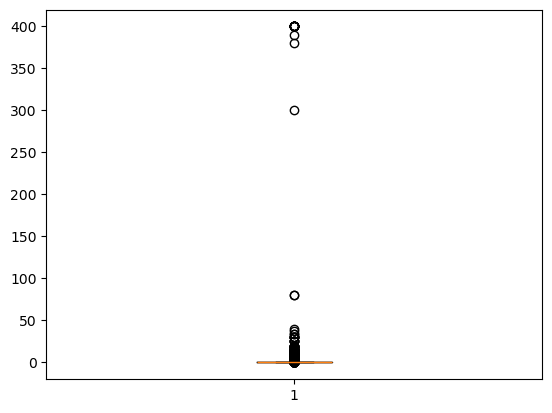

In [62]:
#Create a box plot for the price column
plt.boxplot(imp1.Price)
plt.show()

In [63]:
#Check the apps with price more than 200
imp1[imp1.Price > 200]

App   Category  Rating  Reviews     Size  \
4197          most expensive app (H)     FAMILY     4.3        6   1500.0   
4362                      💎 I'm rich  LIFESTYLE     3.8      718  26000.0   
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300.0   
5351                       I am rich  LIFESTYLE     3.8     3547   1800.0   
5354                  I am Rich Plus     FAMILY     4.0      856   8700.0   
5355                   I am rich VIP  LIFESTYLE     3.8      411   2600.0   
5356               I Am Rich Premium    FINANCE     4.1     1867   4700.0   
5357             I am extremely Rich  LIFESTYLE     2.9       41   2900.0   
5358                      I am Rich!    FINANCE     3.8       93  22000.0   
5359              I am rich(premium)    FINANCE     3.5      472    965.0   
5362                   I Am Rich Pro     FAMILY     4.4      201   2700.0   
5364  I am rich (Most expensive app)    FINANCE     4.1      129   2700.0   
5366                       I Am Rich     FAMILY     3.6      217   4900.0   
5369                       I am Rich    FINANCE     4.3      180   3800.0   
5373              I AM RICH PRO PLUS    FINANCE     4.0       36  41000.0   

      Installs  Type   Price Content Rating         Genres       Last Updated  \
4197       100  Paid  399.99       Everyone  Entertainment      July 16, 2018   
4362     10000  Paid  399.99       Everyone      Lifestyle     March 11, 2018   
4367     10000  Paid  400.00       Everyone      Lifestyle        May 3, 2018   
5351    100000  Paid  399.99       Everyone      Lifestyle   January 12, 2018   
5354     10000  Paid  399.99       Everyone  Entertainment       May 19, 2018   
5355     10000  Paid  299.99       Everyone      Lifestyle      July 21, 2018   
5356     50000  Paid  399.99       Everyone        Finance  November 12, 2017   
5357      1000  Paid  379.99       Everyone      Lifestyle       July 1, 2018   
5358      1000  Paid  399.99       Everyone        Finance  December 11, 2017   
5359      5000  Paid  399.99       Everyone        Finance        May 1, 2017   
5362      5000  Paid  399.99       Everyone  Entertainment       May 30, 2017   
5364      1000  Paid  399.99           Teen        Finance   December 6, 2017   
5366     10000  Paid  389.99       Everyone  Entertainment      June 22, 2018   
5369      5000  Paid  399.99       Everyone        Finance     March 22, 2018   
5373      1000  Paid  399.99       Everyone        Finance      June 25, 2018   

     Current Ver   Android Ver  
4197         1.0    7.0 and up  
4362       1.0.0    4.4 and up  
4367       1.0.1    4.1 and up  
5351         2.0  4.0.3 and up  
5354         3.0    4.4 and up  
5355       1.1.1    4.3 and up  
5356         1.6    4.0 and up  
5357         1.0    4.0 and up  
5358         1.0    4.1 and up  
5359         3.4    4.4 and up  
5362        1.54    1.6 and up  
5364           2  4.0.3 and up  
5366         1.5    4.2 and up  
5369         1.0    4.2 and up  
5373       1.0.2    4.1 and up

In [64]:
# remove the records for which price is > 200
imp1= imp1[imp1.Price < 200]

In [65]:
imp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

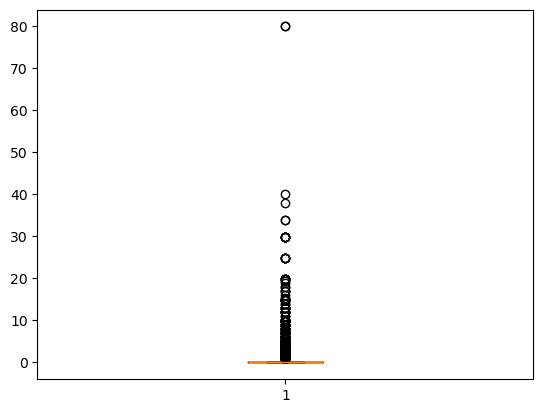

In [66]:
# Check again by plotting now
#imp1[imp1.Price > 0].Price.plot.box()
plt.boxplot(imp1.Price)
plt.show()

In [67]:
imp1[imp1.Price > 30]

App   Category  Rating  Reviews     Size  \
2253  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2301    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2365  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2402    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2414               LTC AS Legal    MEDICAL     4.0        6   1300.0   
5360           I am Rich Person  LIFESTYLE     4.2      134   1800.0   

      Installs  Type  Price Content Rating     Genres     Last Updated  \
2253      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2301      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2365      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2402      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2414       100  Paid  39.99       Everyone    Medical    April 4, 2018   
5360      1000  Paid  37.99       Everyone  Lifestyle    July 18, 2017   

     Current Ver   Android Ver  
2253        19.0  4.0.3 and up  
2301      2.1.35    4.0 and up  
2365        19.0  4.0.3 and up  
2402      2.1.35    4.0 and up  
2414       3.0.1    4.1 and up  
5360         1.0  4.0.3 and up

In [68]:
#Clean the Price column
imp1 = imp1[imp1.Price < 30]

In [69]:
imp1.shape

(9338, 13)

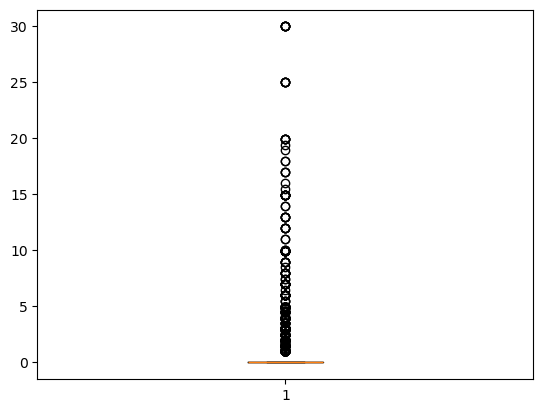

In [70]:
# Check again by plotting now for apps < 30
plt.boxplot(imp1.Price)
plt.show()


In [71]:
#Check the apps with price more than 30


In [72]:
#Clean the Price column again


### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

In [73]:
?plt.hist

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    *,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

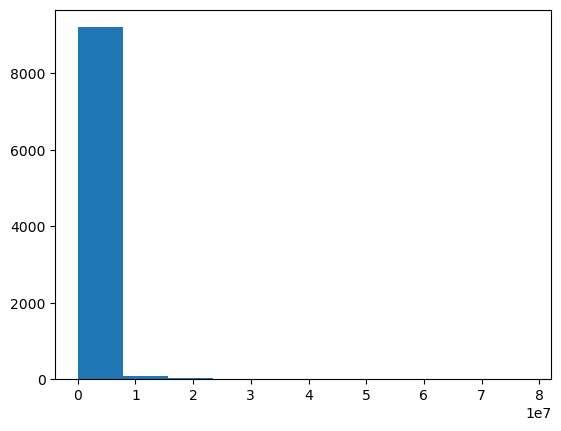

In [74]:
#Create a histogram of the Reviews
plt.hist(imp1.Reviews)
plt.show()

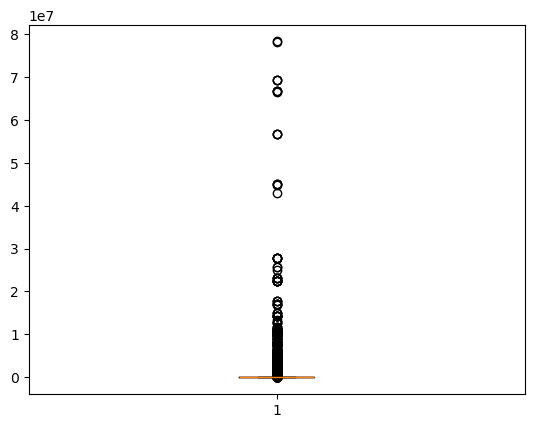

In [75]:
#Create a boxplot of the Reviews column
plt.boxplot(imp1.Reviews)
plt.show()

In [76]:
#Check records with 1 million reviews
imp1[imp1.Reviews >= 1000000]

App             Category  Rating  \
139                      Wattpad 📖 Free Books  BOOKS_AND_REFERENCE     4.6   
152                         Google Play Books  BOOKS_AND_REFERENCE     3.9   
189                               Uber Driver             BUSINESS     4.4   
194    OfficeSuite : Free Office + PDF Editor             BUSINESS     4.3   
201                    Facebook Pages Manager             BUSINESS     4.0   
...                                       ...                  ...     ...   
10190                         Fallout Shelter               FAMILY     4.6   
10200                  Facebook Pages Manager             BUSINESS     4.0   
10327                        Garena Free Fire                 GAME     4.5   
10636                      FRONTLINE COMMANDO                 GAME     4.4   
10707          Photo Editor Collage Maker Pro          PHOTOGRAPHY     4.5   

       Reviews          Size    Installs  Type  Price Content Rating  \
139    2914724  21516.529524   100000000  Free    0.0           Teen   
152    1433233  21516.529524  1000000000  Free    0.0           Teen   
189    1254730  21516.529524    10000000  Free    0.0       Everyone   
194    1002861  35000.000000   100000000  Free    0.0       Everyone   
201    1279184  21516.529524    50000000  Free    0.0       Everyone   
...        ...           ...         ...   ...    ...            ...   
10190  2721923  25000.000000    10000000  Free    0.0           Teen   
10200  1279800  21516.529524    50000000  Free    0.0       Everyone   
10327  5534114  53000.000000   100000000  Free    0.0           Teen   
10636  1351833  12000.000000    10000000  Free    0.0           Teen   
10707  1519671  21516.529524   100000000  Free    0.0       Everyone   

                  Genres      Last Updated         Current Ver  \
139    Books & Reference    August 1, 2018  Varies with device   
152    Books & Reference    August 3, 2018  Varies with device   
189             Business    August 3, 2018  Varies with device   
194             Business    August 2, 2018           9.7.14188   
201             Business    August 2, 2018  Varies with device   
...                  ...               ...                 ...   
10190         Simulation     June 11, 2018             1.13.12   
10200           Business    August 6, 2018  Varies with device   
10327             Action    August 3, 2018              1.21.0   
10636             Action  October 28, 2013               3.0.3   
10707        Photography  February 1, 2018  Varies with device   

              Android Ver  
139    Varies with device  
152    Varies with device  
189    Varies with device  
194            4.1 and up  
201    Varies with device  
...                   ...  
10190          4.1 and up  
10200  Varies with device  
10327        4.0.3 and up  
10636          2.1 and up  
10707  Varies with device  

[704 rows x 13 columns]

In [77]:
#Drop the above records where Reviews more than 1 million
impl1 = imp1[imp1.Reviews <= 1000000]

In [78]:
impl1.shape

(8634, 13)

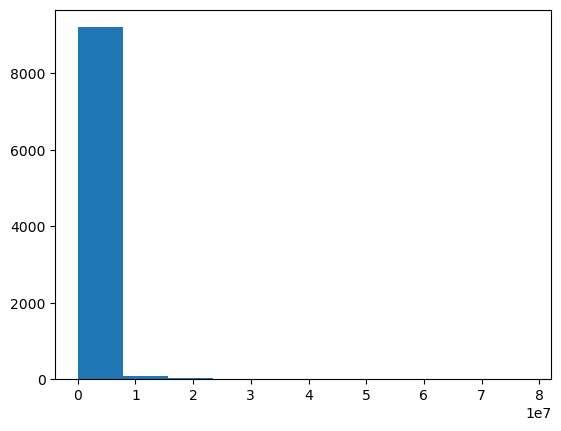

In [79]:
#Question - Create a histogram again and check the peaks
plt.hist(imp1.Reviews)
plt.show()

In [80]:
#Question - Create a box plot for the Installs column and report back the IQR
imp1.Installs.describe()

count    9.338000e+03
mean     1.795108e+07
std      9.136965e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [81]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
imp1[imp1.Installs <=  100000000]
impl1.shape

(8634, 13)

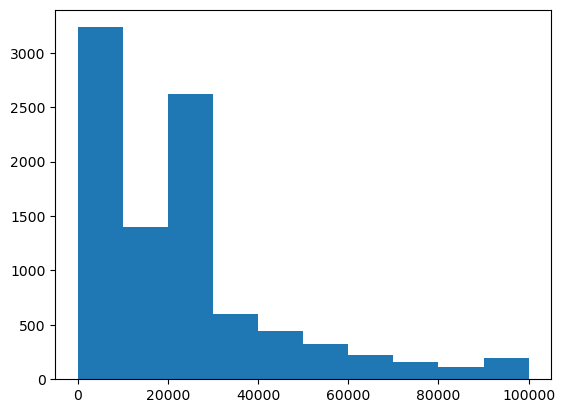

In [82]:
#Plot a histogram for Size as well.
plt.hist(imp1.Size)
plt.show()

In [83]:
#Question - Create a boxplot for the Size column and report back the median value

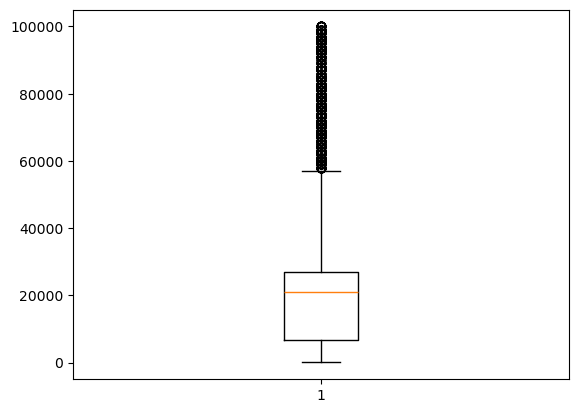

In [84]:
#Plot a histogram for Size as well.
plt.boxplot(imp1.Size)
plt.show()

In [85]:
imp1.Size.describe()

count      9338.000000
mean      22725.789334
std       21310.340299
min           8.500000
25%        6600.000000
50%       21000.000000
75%       27000.000000
max      100000.000000
Name: Size, dtype: float64

# Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes
- 
Key Differences
Feature	    sns.distplot() (Seaborn)	  .plot.hist() (Pandas/Matplotlib)
Histogram	    ✅ Yes	                       ✅ Yes
KDE Curve	    ✅ (Default ON)	           ❌ No
Styling	        ✅ More polished	           ❌ Basic
Customizability	✅ Seaborn options available   ✅ Matplotlib options available

In [86]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve.

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

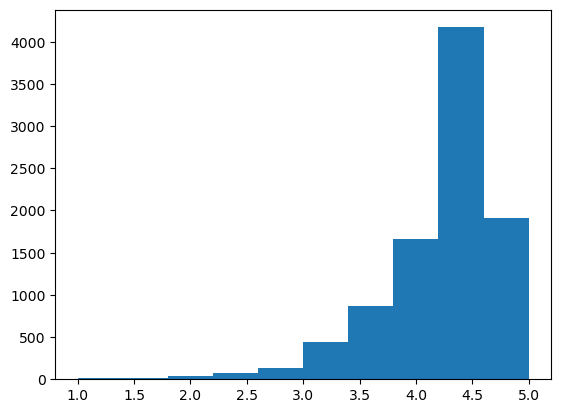

In [87]:
#Create a distribution plot for rating
# 1st method
plt.hist(imp1.Rating)
plt.show()

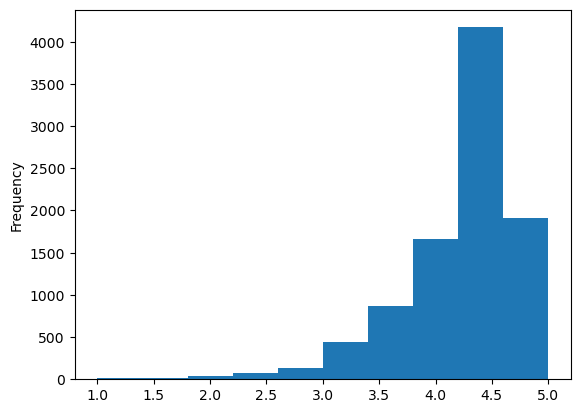

In [88]:
# 2nd method
imp1.Rating.plot.hist()
plt.show()

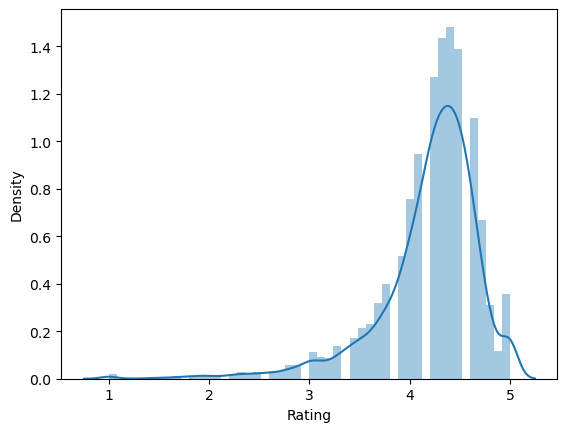

In [89]:
#Create a distribution plot for rating
# By Seaborn
import seaborn as sns
sns.distplot(imp1.Rating) 
plt.show()   # it Overlays a KDE (Kernel Density Estimation) curve

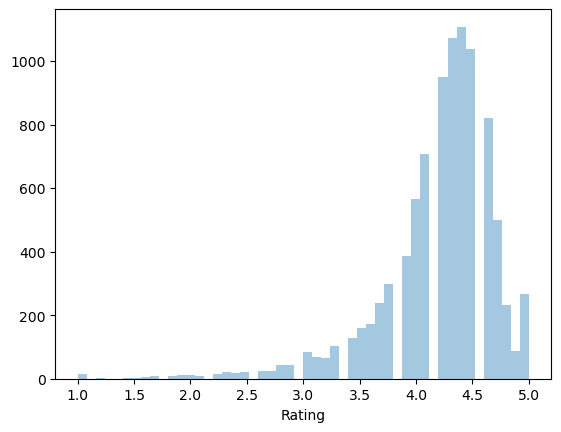

In [90]:
sns.distplot(imp1.Rating,kde = False)
plt.show()

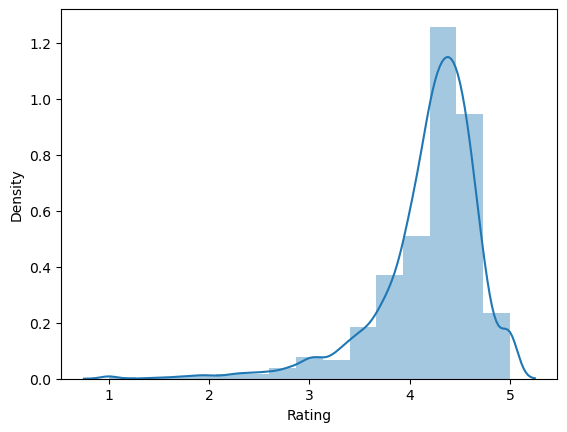

In [91]:
#Change the number of bins
sns.distplot(imp1.Rating,bins=15)
plt.show()

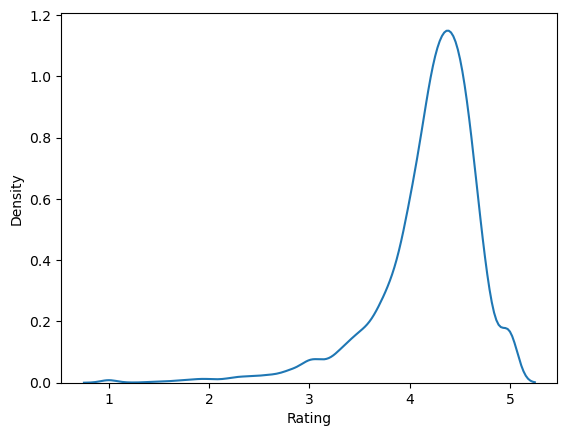

In [92]:
#Show only the KDE curve
sns.distplot(imp1.Rating,bins=15,hist=False)
plt.show()

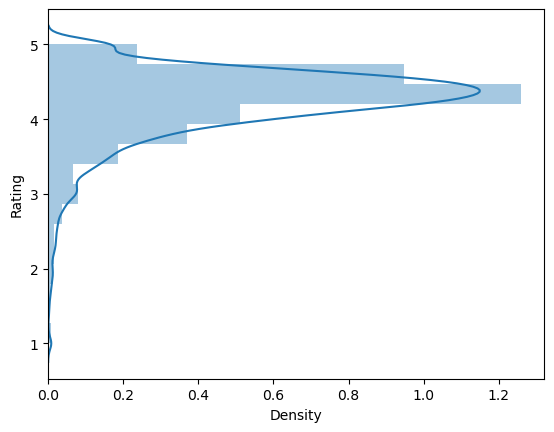

In [93]:
#Change the orientation
sns.distplot(imp1.Rating,bins=15,vertical = True)
plt.show()

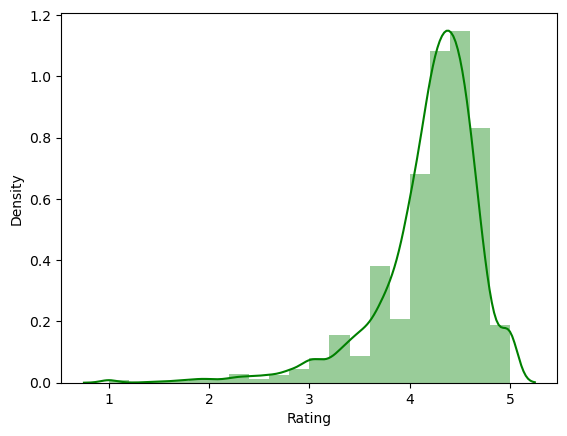

In [94]:
#Change the colour of bins to green
sns.distplot(imp1.Rating,bins=20,color='g')
plt.show()

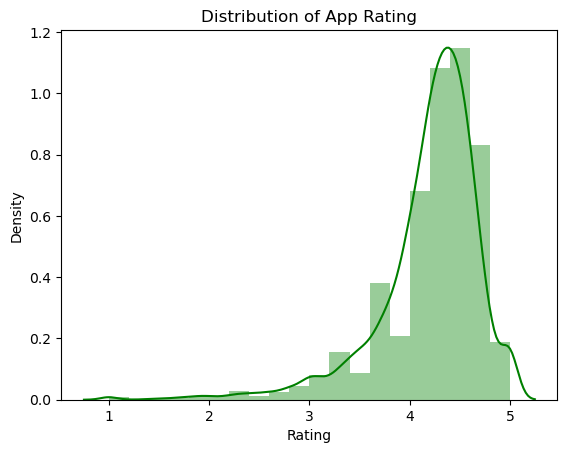

In [95]:
#Apply matplotlib with seaborn functionalities
sns.distplot(imp1.Rating,bins=20,color='g')
plt.title("Distribution of App Rating",fontsize=12)     #N.B : Here we have use matplotlib
plt.show()

#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

In [96]:
#Check all the styling options
?sns.set_style

Signature: sns.set_style(style=None, rc=None)
Docstring:
Set the parameters that control the general style of the plots.

The style parameters control properties like the color of the background and
whether a grid is enabled by default. This is accomplished using the
matplotlib rcParams system.

The options are illustrated in the
:doc:`aesthetics tutorial <../tutorial/aesthetics>`.

See :func:`axes_style` to get the parameter values.

Parameters
----------
style : dict, or one of {darkgrid, whitegrid, dark, white, ticks}
    A dictionary of parameters or the name of a preconfigured style.
rc : dict, optional
    Parameter mappings to override the values in the preset seaborn
    style dictionaries. This only updates parameters that are
    considered part of the style definition.

Examples
--------

.. include:: ../docstrings/set_style.rst
File:      c:\programdata\anaconda3\lib\site-packages\seaborn\rcmod.py
Type:      function

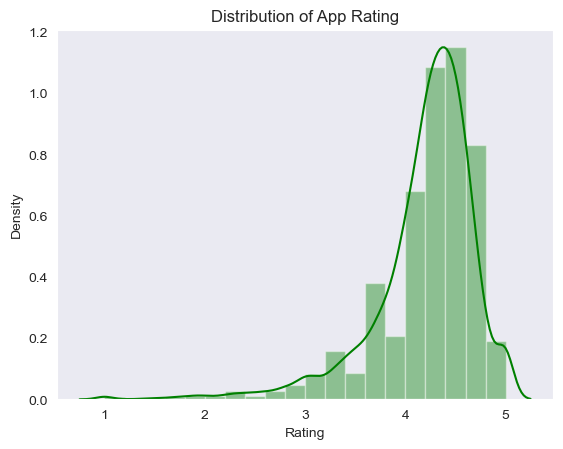

In [97]:
#Change the background
sns.set_style("dark")        #N.B : The background changed and the rectangle border vanished
sns.distplot(imp1.Rating,bins=20,color='g')
plt.title("Distribution of App Rating",fontsize=12)     #N.B : Here we have use matplotlib
plt.show()

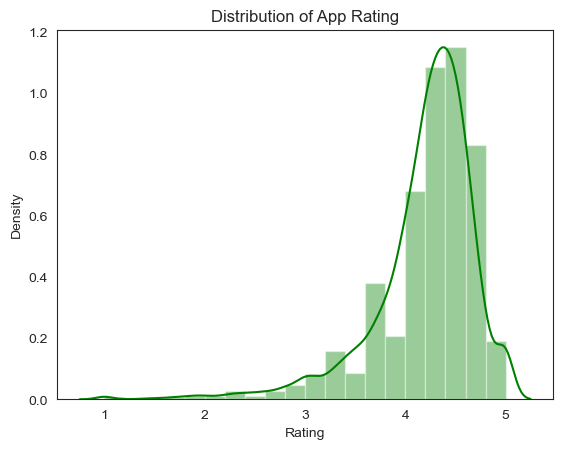

In [98]:
#Change the background
sns.set_style("white")        #N.B : The background changed to the same where before applying any style
sns.distplot(imp1.Rating,bins=20,color='g')
plt.title("Distribution of App Rating",fontsize=12)     #N.B : Here we have use matplotlib
plt.show()

#### Matplotlib themes/styles

In [99]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [100]:
plt.style.use('tableau-colorblind10')

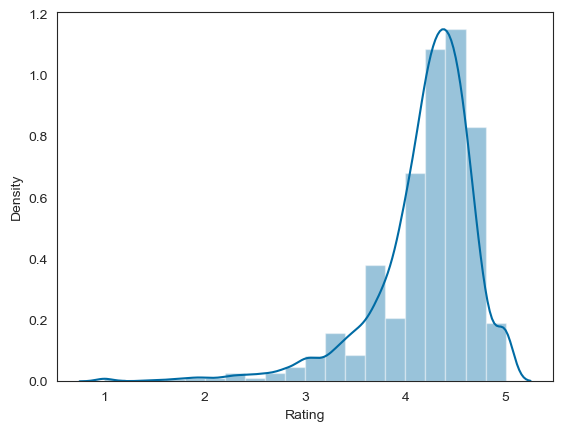

In [101]:
sns.distplot(imp1.Rating,bins=20)
plt.show()

In [102]:
plt.style.use('ggplot')

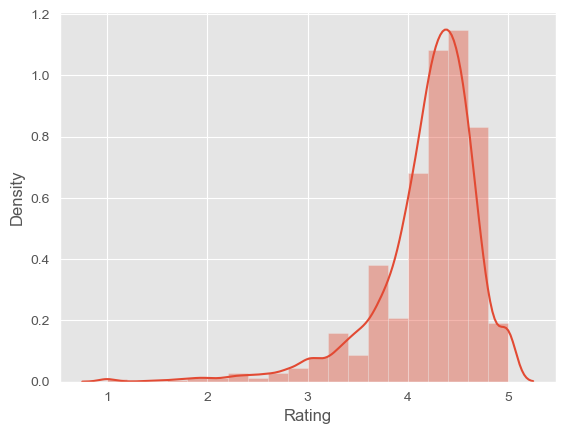

In [103]:
sns.distplot(imp1.Rating,bins=20)
plt.show()

In [104]:
plt.style.use('dark_background')

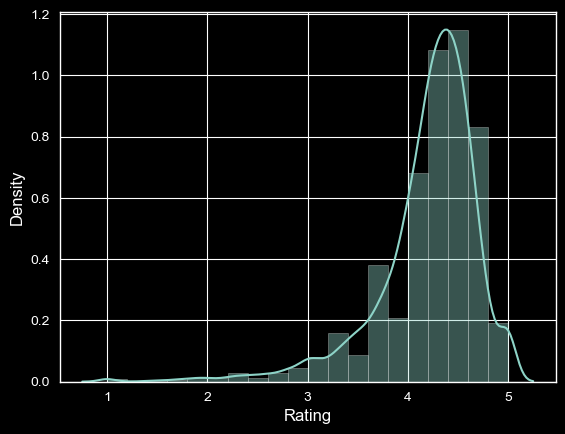

In [105]:
sns.distplot(imp1.Rating,bins=20)
plt.show()

In [106]:
# Setting Default setting for plot
plt.style.use("default")
%matplotlib inline

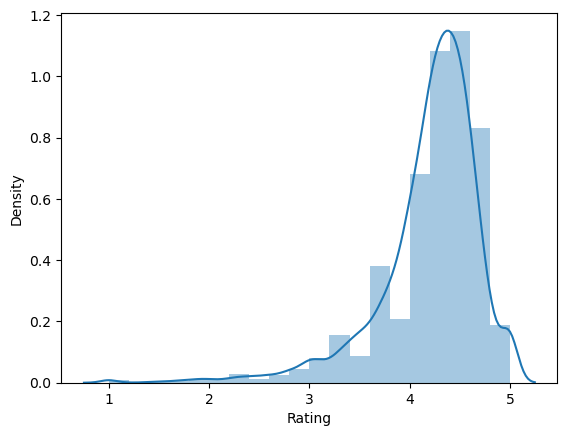

In [107]:
# verify the graph
sns.distplot(imp1.Rating,bins=20)
plt.show()

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [108]:
#Analyse the Content Rating column
imp1['Content Rating']

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10834      Everyone
10836      Everyone
10837      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 9338, dtype: object

In [109]:
# see the different values and their counts
imp1['Content Rating'].value_counts()

Content Rating
Everyone           7394
Teen               1082
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [110]:
#Remove the rows with values which are less represented : Adults only 18+ and Unrated
imp1 = imp1[ ~imp1["Content Rating"].isin( ['Adults only 18+','Unrated'] )   ]

In [111]:
# vwrify the different values and their counts
imp1['Content Rating'].value_counts()

Content Rating
Everyone        7394
Teen            1082
Mature 17+       461
Everyone 10+     397
Name: count, dtype: int64

In [112]:
# Check the row count
imp1.shape

(9334, 13)

In [113]:
#Reset the index as we dropped some rows. It will make continuous index
imp1.reset_index(inplace=True, drop=True)

In [114]:
imp1.info()  # you can match Index: 9334 entries with rowcount in previous step to see whether index is continuous or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9334 non-null   object 
 1   Category        9334 non-null   object 
 2   Rating          9334 non-null   float64
 3   Reviews         9334 non-null   int32  
 4   Size            9334 non-null   float64
 5   Installs        9334 non-null   int32  
 6   Type            9334 non-null   object 
 7   Price           9334 non-null   float64
 8   Content Rating  9334 non-null   object 
 9   Genres          9334 non-null   object 
 10  Last Updated    9334 non-null   object 
 11  Current Ver     9334 non-null   object 
 12  Android Ver     9334 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 875.2+ KB


In [115]:
#Check the apps belonging to different categories of Content Rating
imp1['Content Rating'].value_counts()

Content Rating
Everyone        7394
Teen            1082
Mature 17+       461
Everyone 10+     397
Name: count, dtype: int64

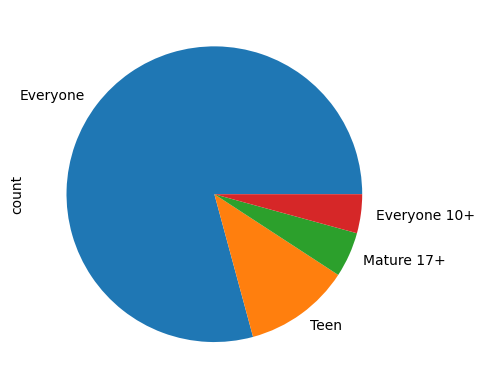

In [116]:
#Plot a pie chart
imp1['Content Rating'].value_counts().plot.pie()
plt.show()   # here it is hard to come to conclusion between Mature 17+ and Everyone 10+ which is greater by pie chart

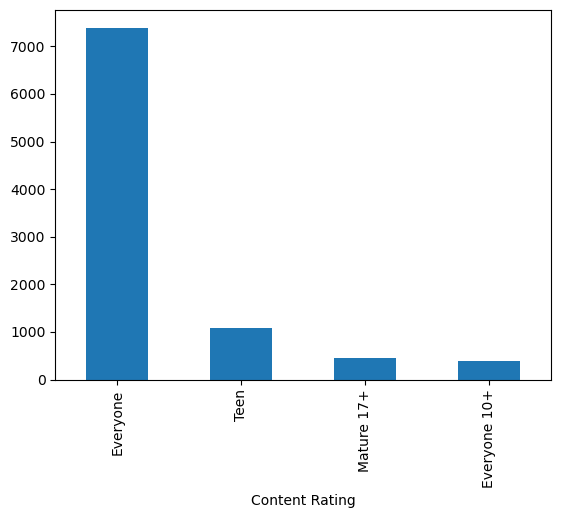

In [117]:
#Plot a bar chart
imp1['Content Rating'].value_counts().plot.bar()
plt.show()   # here it is clear comparison between Mature 17+ and Everyone 10+ which is greater by pie chart

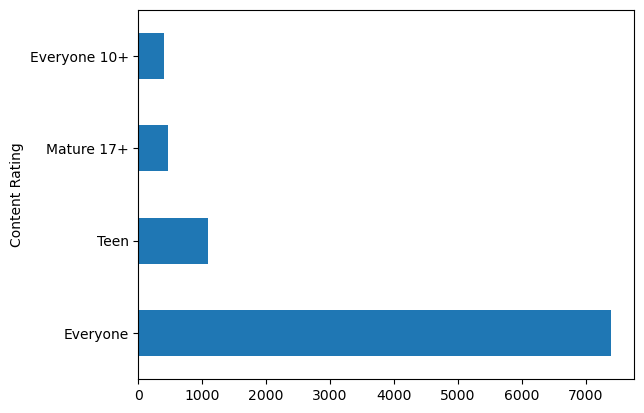

In [118]:
#Plot a horizontal bar chart
imp1['Content Rating'].value_counts().plot.barh()
plt.show()   # here it is more clear comparison between Mature 17+ and Everyone 10+ which is greater by pie chart

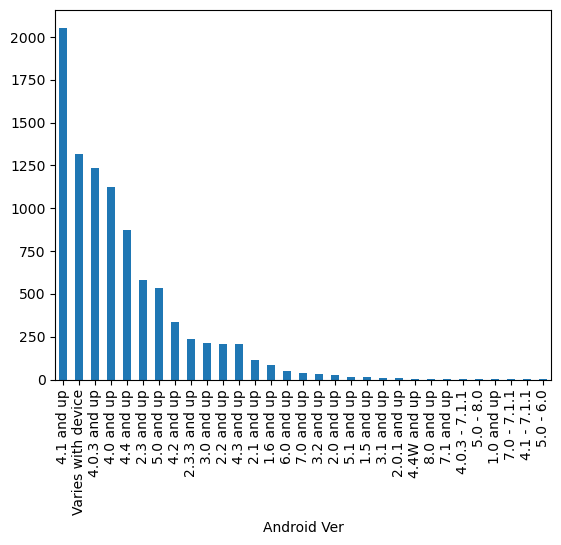

In [119]:
#Question - Plot a bar plot for checking the 4th highest Android version type
imp1['Android Ver'].value_counts().plot.bar()
plt.show()

#### Scatter Plots -- For comparing 2 numerical variable

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot.

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

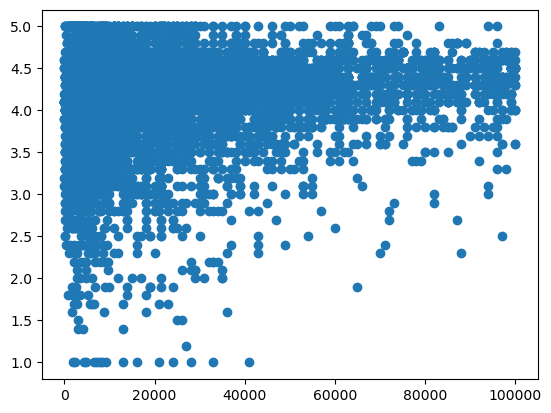

In [120]:
###Size(X axis) vs Rating (Y axis) -- By matplotlib 
plt.scatter(imp1.Size, imp1.Rating)  
##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.show()

### Jointplot -- By seaborn , it comes with Scatter Plot and as well Histogram also outside the rectangle 

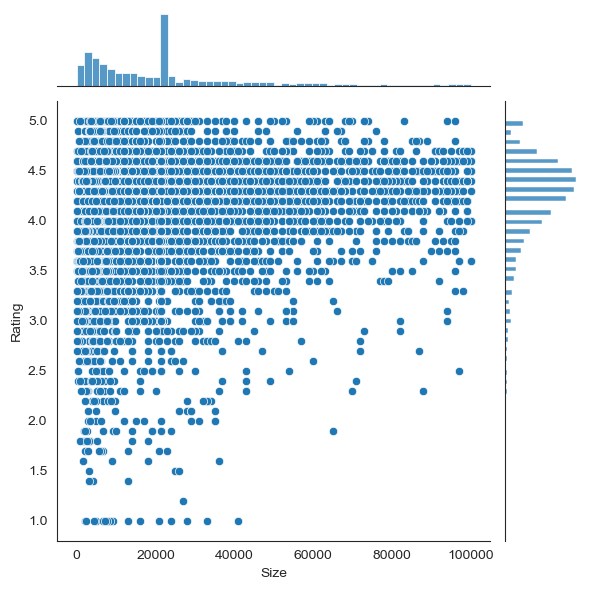

In [121]:
### Plot the same thing now using a jointplot -- By seaborn , it comes with histogram also outside the rectangle 
sns.set_style("white")
#?sns.jointplot
sns.jointplot(x=imp1.Size, y=imp1.Rating)
plt.show()

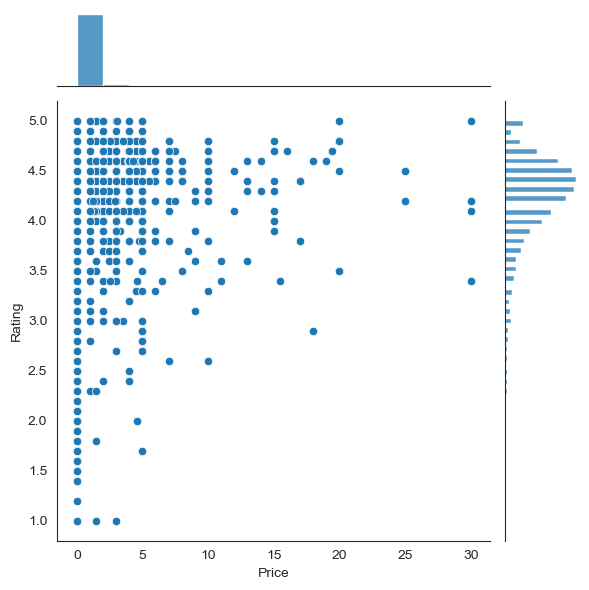

In [122]:
## Plot a jointplot for Price and Rating
sns.jointplot(x=imp1.Price, y=imp1.Rating)
plt.show()

**Reg Plots -- Scatter Plot , Histogram and a Line to sow the slope  (Jointplot + Slope line)** 

- These are an extension to the jointplots, where a regression line is added to the view

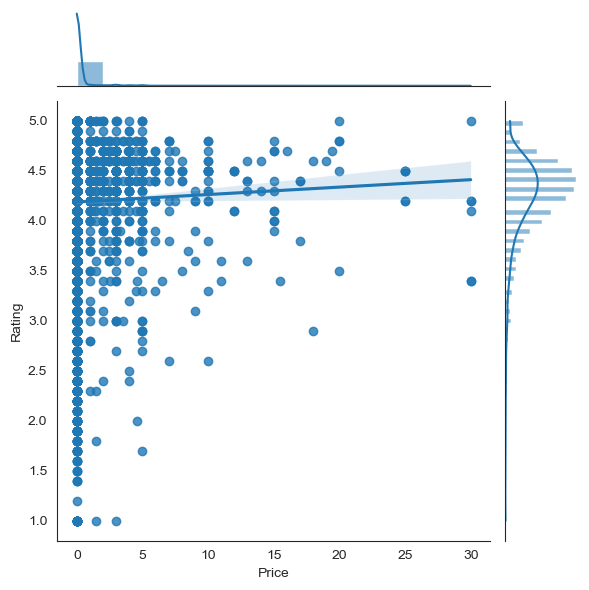

In [123]:
##Plot a reg plot for Price and Rating and observe the trend # see the slope of the line has +ve slope Price increase then Rating increase
sns.jointplot(x=imp1.Price, y=imp1.Rating , kind="reg") # in parameter 'reg', both " and ' are allowed
plt.show()

In [124]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.


**Pair Plots  - For more than 2 numerical value relationship between each other**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [125]:
# help on sns.pairplot
?sns.pairplot

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

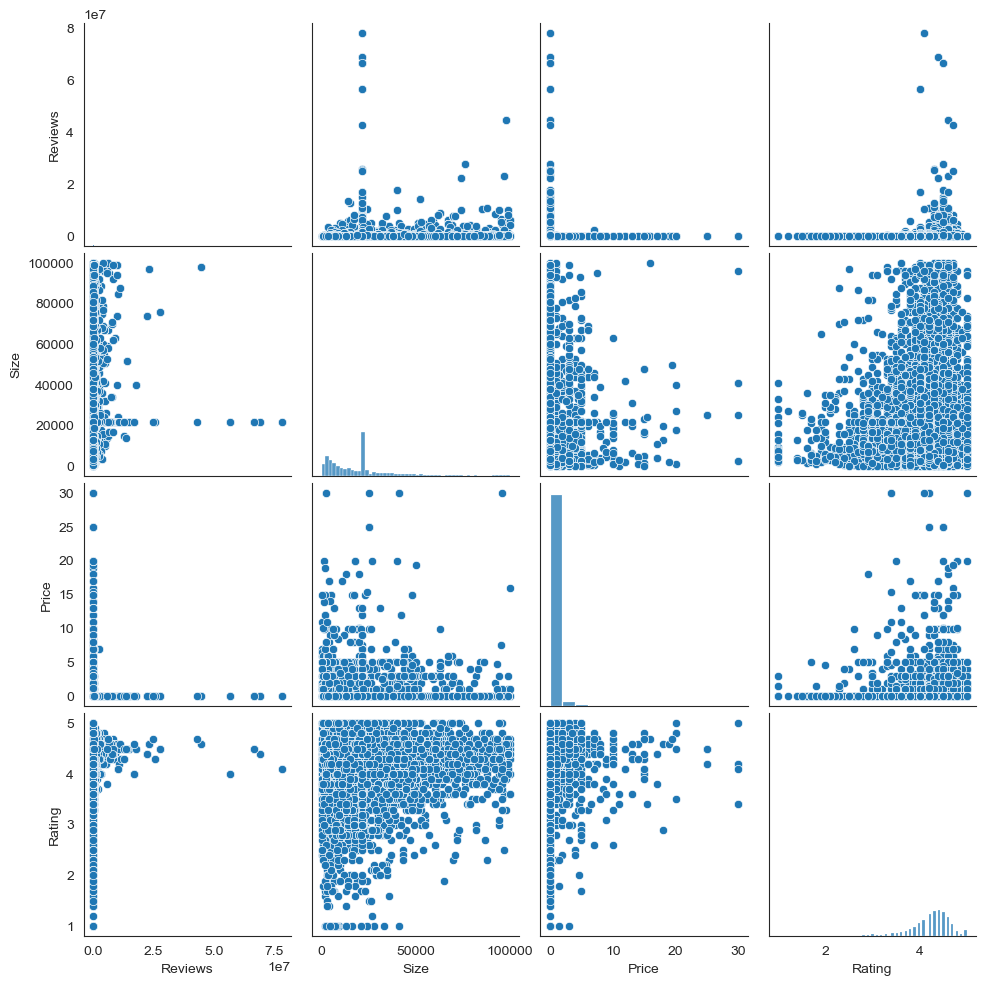

In [126]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(imp1[['Reviews','Size','Price','Rating']])  # N.B : Takes some time and comparing with seld it will plot histogram only no scatter plot
plt.show()

**Bar Charts Revisited (sns.barplot)-- Categorical (Group By Field) Vs Numerical Data (Smm, Mean, Max, Min operation)  **

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

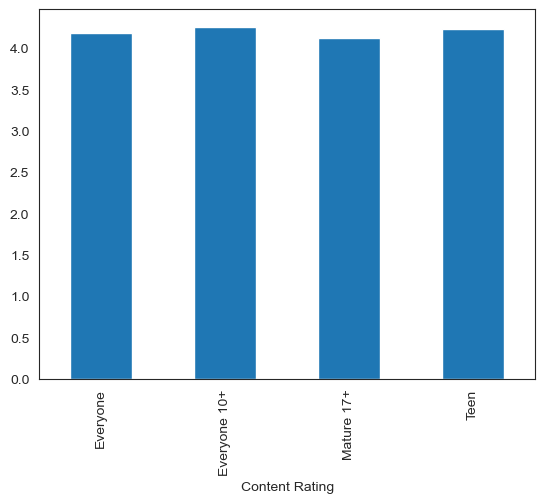

In [127]:
##Plot a bar plot of Content Rating vs Average Rating  -- Mean
imp1.groupby( ['Content Rating'])['Rating'].mean().plot.bar()
plt.show()

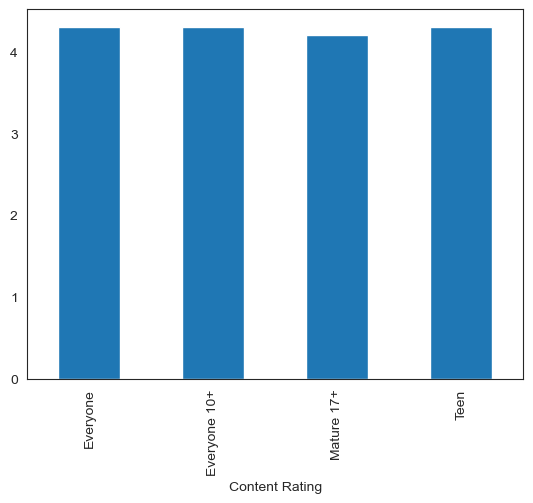

In [128]:
##Plot the bar plot again with Median Rating
##Plot a bar plot of Content Rating vs Average Rating -- Median
imp1.groupby( ['Content Rating'])['Rating'].median().plot.bar()
plt.show()

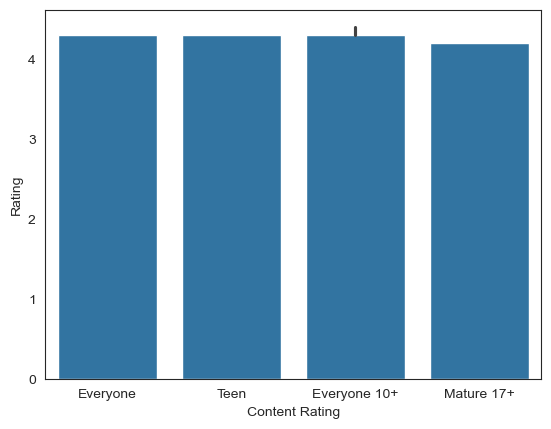

In [129]:
##Plot the above bar plot using the estimator parameter : using seaborn
sns.barplot(data=imp1, x="Content Rating", y="Rating", estimator=np.median) # median is 50th percentile
plt.show()

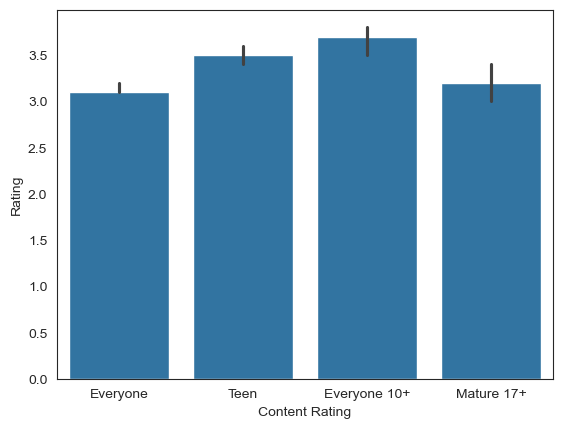

In [130]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data=imp1, x="Content Rating", y="Rating", estimator=lambda x : np.quantile(x, 0.05))
plt.show()

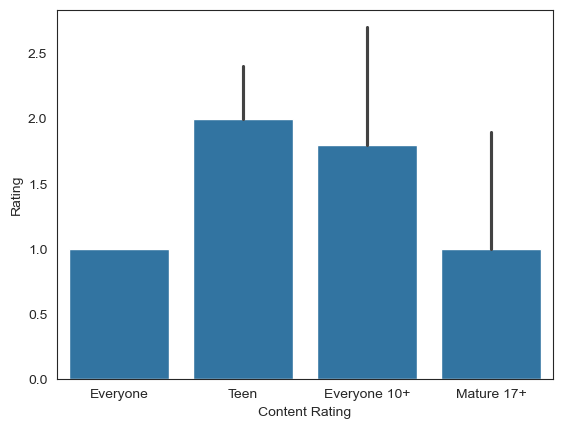

In [131]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(data=imp1, x="Content Rating", y="Rating", estimator=np.min)
plt.show()

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




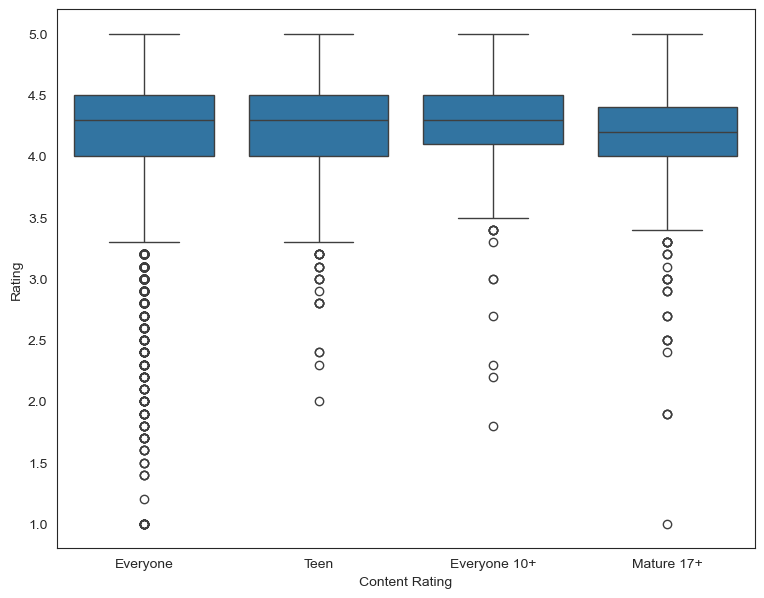

In [132]:
##Plot a box plot of Rating vs Content Rating
plt.figure(figsize=[9,7])
sns.boxplot(x=imp1["Content Rating"], y=imp1["Rating"])
plt.show()

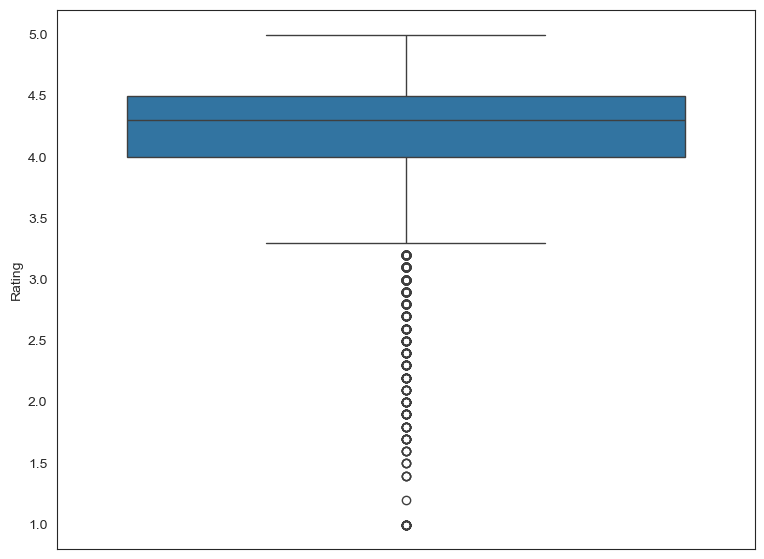

In [133]:
##Question - Plot a box plot for the Rating column only
plt.figure(figsize=[9,7])
sns.boxplot(y=imp1["Rating"])
plt.show()

In [ ]:
### For the 4 most popular Genres, plot a box plot and report back the Genre having the highest Rating at the lower fence.

In [155]:
imp1.Genres.value_counts()

Genres
Tools                      732
Entertainment              529
Education                  468
Action                     358
Productivity               351
                          ... 
Parenting;Brain Games        1
Card;Brain Games             1
Tools;Education              1
Entertainment;Education      1
Strategy;Creativity          1
Name: count, Length: 115, dtype: int64

In [160]:
imp_G = imp1[ imp1["Genres"].isin( ['Tools','Entertainment','Education','Action'] ) ]
imp_G.Genres.describe()

count      2087
unique        4
top       Tools
freq        732
Name: Genres, dtype: object

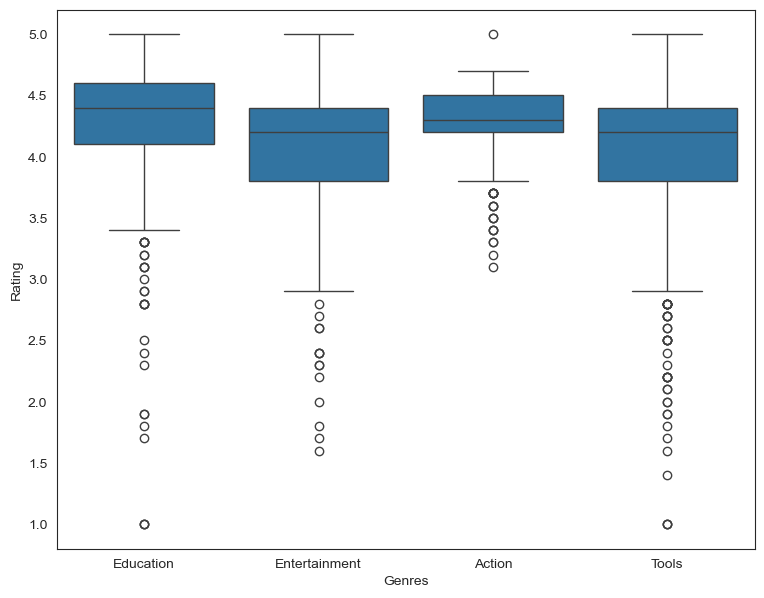

In [163]:
plt.figure(figsize=[9,7])
sns.boxplot(x=imp_G["Genres"], y=imp_G["Rating"])
plt.show()

#### Heat Maps -- More than 2 variable inputs

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [168]:
# it cuts data in different Quartile bucket
?pd.qcut

Signature:
pd.qcut(
    x,
    q,
    labels=None,
    retbins: 'bool' = False,
    precision: 'int' = 3,
    duplicates: 'str' = 'raise',
)
Docstring:
Quantile-based discretization function.

Discretize variable into equal-sized buckets based on rank or based
on sample quantiles. For example 1000 values for 10 quantiles would
produce a Categorical object indicating quantile membership for each data point.

Parameters
----------
x : 1d ndarray or Series
q : int or list-like of float
    Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
    array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.
labels : array or False, default None
    Used as labels for the resulting bins. Must be of the same length as
    the resulting bins. If False, return only integer indicators of the
    bins. If True, raises an error.
retbins : bool, optional
    Whether to return the (bins, labels) or not. Can be useful if bins
    is given as a scalar.
precision : int, optional
    

In [171]:
##Ratings vs Size vs Content Rating
# Step 1 : We will divide the records into 5 different bins based on size of App
##Prepare buckets for the Size column using pd.qcut
imp1['Size_Bucket'] = pd.qcut( imp1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1] ,['VL','L','M','H','VH'] ) # There are 5 bickets
imp1.head()


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   
3   215644  25000.0  50000000  Free    0.0           Teen   
4      967   2800.0    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver Size_Bucket  
0  4.0.3 and up           M  
1  4.0.3 and up           L  
2  4.0.3 and up           L  
3    4.2 and up           H  
4    4.4 and up          VL

In [172]:
# Pivot table hint
?pd.pivot

Signature:
pd.pivot(
    data: 'DataFrame',
    *,
    columns: 'IndexLabel',
    index: 'IndexLabel | lib.NoDefault' = <no_default>,
    values: 'IndexLabel | lib.NoDefault' = <no_default>,
) -> 'DataFrame'
Docstring:
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a "pivot" table) based on column values. Uses
unique values from specified `index` / `columns` to form axes of the
resulting DataFrame. This function does not support data
aggregation, multiple values will result in a MultiIndex in the
columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

Parameters
----------
data : DataFrame
columns : str or object or a list of str
    Column to use to make new frame's columns.
index : str or object or a list of str, optional
    Column to use to make new frame's index. If not given, uses existing index.
values : str, object or a list of the previous, optional
    Column(s) to use for populating new frame's values. If not
    spe

#### displaying Mean rating based on the Content Rating and App Size Bucket

In [173]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data = imp1, index='Content Rating', columns='Size_Bucket' , values='Rating' )
# displaying mean rating based on the Content Rating and App Size Bucket

Size_Bucket           VL         L         M         H        VH
Content Rating                                                  
Everyone        4.114026  4.167953  4.254010  4.163872  4.222132
Everyone 10+    4.189474  4.251282  4.253153  4.226761  4.283439
Mature 17+      4.112281  4.057292  4.098592  4.174603  4.194175
Teen            4.199074  4.221893  4.207101  4.228462  4.276855

#### displaying Median rating based on the Content Rating and App Size Bucket

In [174]:
##Change the aggregation to median
pd.pivot_table(data = imp1, index='Content Rating', columns='Size_Bucket' , values='Rating' , aggfunc=np.median)
# displaying mean rating based on the Content Rating and App Size Bucket

Size_Bucket      VL    L    M     H   VH
Content Rating                          
Everyone        4.2  4.3  4.3  4.30  4.3
Everyone 10+    4.1  4.3  4.3  4.30  4.4
Mature 17+      4.3  4.2  4.2  4.20  4.2
Teen            4.3  4.3  4.3  4.25  4.3

#### Change the aggregation to 20th percentile -- using lambda function

In [175]:
##Change the aggregation to 20th percentile
pd.pivot_table(data = imp1, index='Content Rating', columns='Size_Bucket' , values='Rating' , aggfunc=lambda x : np.quantile(x, 0.2))

Size_Bucket       VL     L    M     H    VH
Content Rating                             
Everyone        3.80  3.80  4.1  3.82  4.00
Everyone 10+    3.86  4.06  4.1  4.00  4.02
Mature 17+      3.42  3.60  4.0  3.90  4.00
Teen            3.80  3.90  4.0  4.00  4.00

In [176]:
##Store the pivot table in a separate variable
res = pd.pivot_table(data = imp1, index='Content Rating', columns='Size_Bucket' , values='Rating' , aggfunc=lambda x : np.quantile(x, 0.2))

In [ ]:
# Help of sns.heatmap 
?sns.heatmap

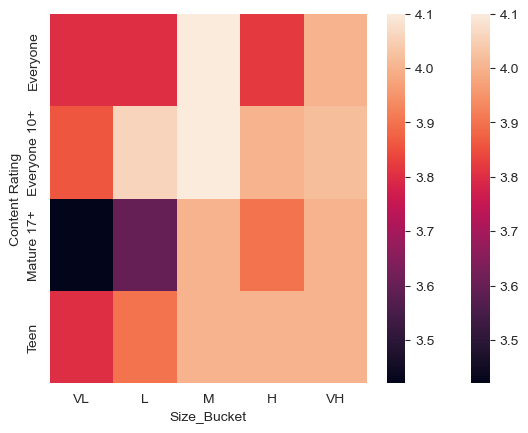

In [178]:
##Plot a heat map
sns.heatmap(res)
plt.show()

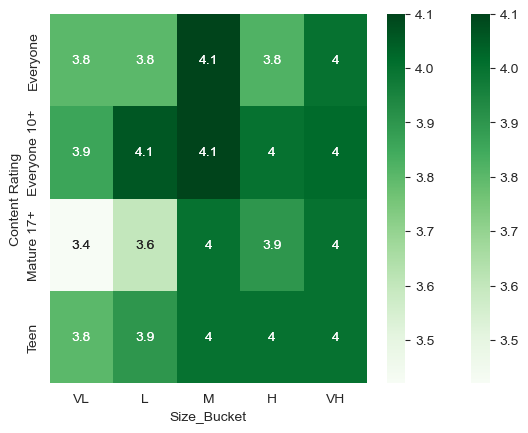

In [180]:
##Apply customisations
sns.heatmap(res, cmap="Greens", annot=True)
plt.show()

In [182]:
##Question - Replace Content Rating with Review_buckets in the above heat map
imp1['Review_Bucket'] = pd.qcut( imp1.Reviews, [0, 0.2, 0.4, 0.6, 0.8, 1] ,['VLR','LR','MR','HR','VHR'] ) # There are 5 bickets
imp1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   
3   215644  25000.0  50000000  Free    0.0           Teen   
4      967   2800.0    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver Size_Bucket Review_Bucket  
0  4.0.3 and up           M            LR  
1  4.0.3 and up           L            LR  
2  4.0.3 and up           L            HR  
3    4.2 and up           H           VHR  
4    4.4 and up          VL            LR

In [185]:
##Keep the aggregation at minimum value for Rating
res_1 = pd.pivot_table(data = imp1, index='Review_Bucket', columns='Size_Bucket' , values='Rating' , aggfunc=np.min)

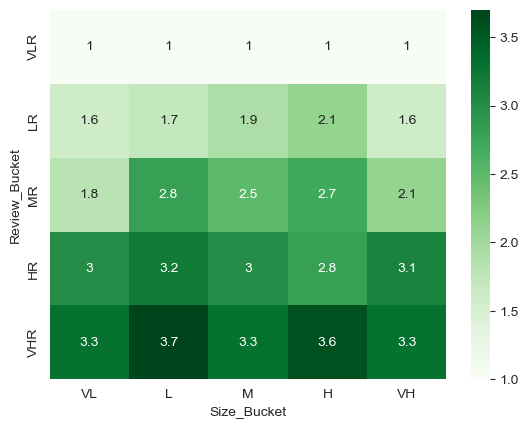

In [186]:
##Apply customisations
sns.heatmap(res_1, cmap="Greens", annot=True)
plt.show()

### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [189]:
imp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
Review_Bucket     category
dtype: object

In [190]:
imp1["Last Updated"].value_counts()

Last Updated
August 3, 2018      318
August 2, 2018      283
July 31, 2018       279
August 1, 2018      275
July 30, 2018       198
                   ... 
March 28, 2016        1
April 17, 2014        1
April 11, 2016        1
October 27, 2015      1
March 23, 2014        1
Name: count, Length: 1299, dtype: int64

In [192]:
## Extract the month from the Last Updated Date
imp1["Updated_Month"] = pd.to_datetime( imp1["Last Updated"]).dt.month

In [194]:
## Find the average Rating across all the months
imp1.groupby( imp1["Updated_Month"])["Rating"].mean() 

Updated_Month
1     4.143735
2     4.094048
3     4.110989
4     4.154910
5     4.162410
6     4.184316
7     4.249841
8     4.292963
9     4.042636
10    4.019687
11    4.112338
12    4.071726
Name: Rating, dtype: float64

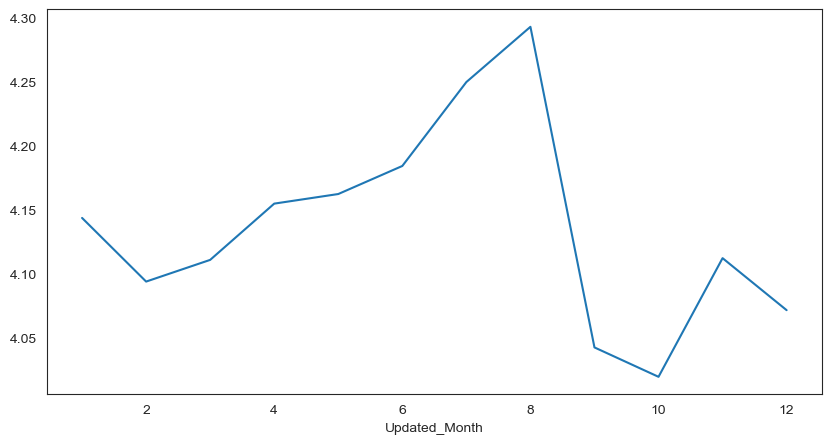

In [198]:
## Plot a line graph
plt.figure(figsize=[10,5])
imp1.groupby( imp1["Updated_Month"])["Rating"].mean().plot()
plt.show()

#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [200]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table( data=imp1, index="Updated_Month" , values='Installs', columns= "Content Rating" , aggfunc=sum)

Content Rating     Everyone  Everyone 10+  Mature 17+         Teen
Updated_Month                                                     
1                1025387390     105282000     9701210     44159010
2                 945372005      19821000    13021500     39597710
3                1045365520      30322510     9111100     99850310
4                2593371180      23300000     5259000    271619410
5                5431067800     128173500   110140100    562689600
6                6157170505    1367727100   155257200    505716600
7               46991109680    9726556000  1739491910  15983556800
8               46490943320    1715821000  3462981700  16997855650
9                 410340410      24931100     2201010     22483100
10                508279680      23101000     3160000     55629210
11               1475424710      60310000     1070100     81261100
12               1077105770       8410000    12960100     51707100

In [201]:
##Store the table in a separate variable
df_m = pd.pivot_table( data=imp1, index="Updated_Month" , values='Installs', columns= "Content Rating" , aggfunc=sum)

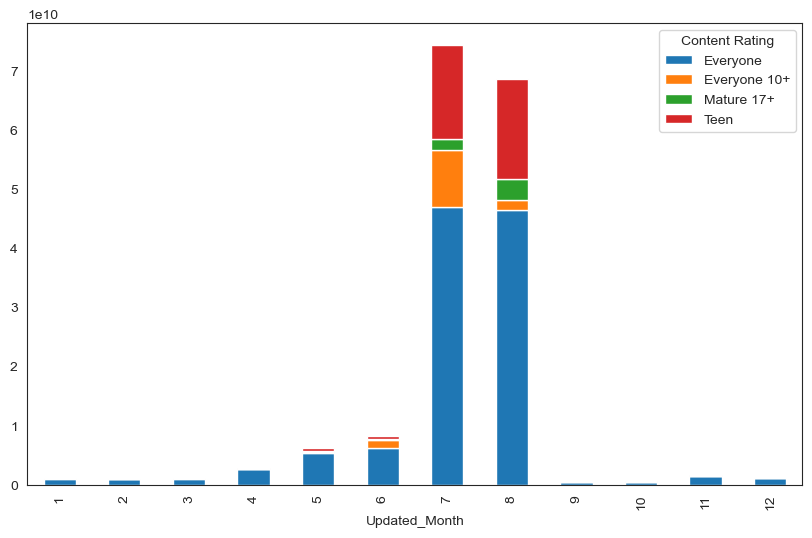

In [205]:
##Plot the stacked bar chart.
df_m.plot(kind="bar", stacked=True, figsize=[10,6])
plt.show()

#### Plot the stacked bar chart again wrt to the proportions.

In [209]:
##Plot the stacked bar chart again wrt to the proportions.
df_m_p = df_m[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x : x/x.sum(), axis=1)

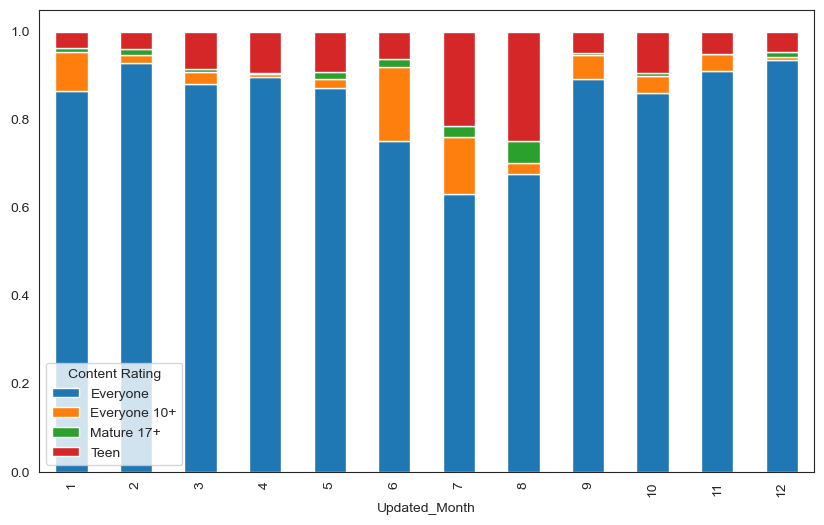

In [214]:
df_m_p.plot(kind="bar", stacked=True, figsize=[10,6])
plt.show()

#### Plotly -- DIsplay value on each point hovering, Zoom In Out facility

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [222]:
df_P = imp1.groupby( imp1["Updated_Month"])[["Rating"]].mean()  # N.B [[ ]] returns DF , [] returns series

In [223]:
df_P.reset_index(inplace=True)
df_P

Updated_Month    Rating
0               1  4.143735
1               2  4.094048
2               3  4.110989
3               4  4.154910
4               5  4.162410
5               6  4.184316
6               7  4.249841
7               8  4.292963
8               9  4.042636
9              10  4.019687
10             11  4.112338
11             12  4.071726

In [224]:
#Install plotly
import plotly.express as px

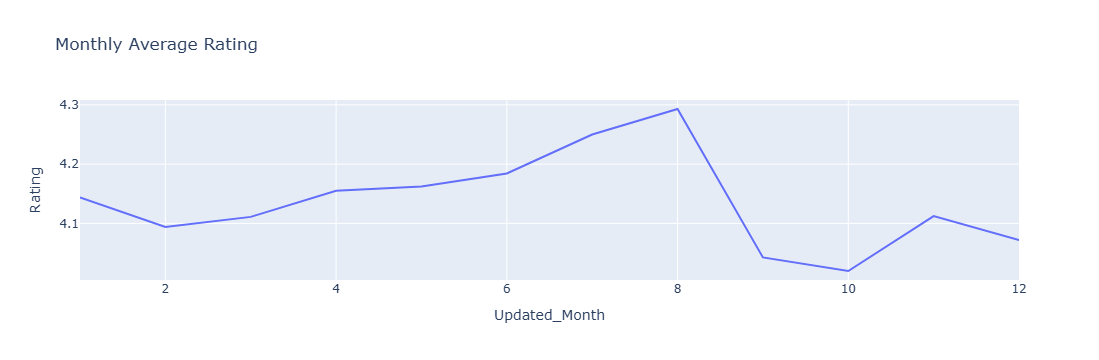

In [225]:
#Take the table you want to plot in a separate variable
fig = px.line(df_P, x="Updated_Month", y="Rating", title="Monthly Average Rating")
fig.show()

In [153]:
#Import the plotly libraries


In [154]:
#Prepare the plot
